## **LIBRARIES DECLARATION**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
import re
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993227 sha256=02c4e902a23a46c987d033f3dbb23b7c0ba9dc528e6393dc3a3c377c4ff7b2ed
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
from langdetect import detect

## **LOADING DATA**

In [ ]:
df_before_cleaning = pd.read_csv("spam.csv",delimiter=',',encoding='latin-1')

In [ ]:
display(df_before_cleaning.head())
df_before_cleaning.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


#Cleaning data

In [ ]:
#delete Unnamed column and change v1 and v2 to class and message
df_before_cleaning = df_before_cleaning.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df_before_cleaning.columns = ['class', 'message']
df_before_cleaning['class'] = df_before_cleaning['class'].replace({'ham': 0, 'spam': 1})

display(df_before_cleaning.head())
display(df_before_cleaning.count())

,class,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


class      5572
message    5572
dtype: int64

In [ ]:
#checking missing message or null message
df_before_cleaning.isnull().sum()

class      0
message    0
dtype: int64

In [ ]:
#check duplicate message
df_before_cleaning.duplicated().sum()

403

In [ ]:
#delete duplicate message
df = df_before_cleaning.drop_duplicates(subset='message', keep='first')
display(df.count())

class      5169
message    5169
dtype: int64

In [ ]:
# Delete row that message is not English
def get_lang(text):
    try:
        return detect(text)
    except:
        return "unknown"

df['language'] = df['message'].apply(get_lang)
display(df)

<ipython-input-10-f6fd226354bd>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['language'] = df['message'].apply(get_lang)


,class,message,language
0,0,"Go until jurong point, crazy.. Available only ...",en
1,0,Ok lar... Joking wif u oni...,id
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,en
3,0,U dun say so early hor... U c already then say...,en
4,0,"Nah I don't think he goes to usf, he lives aro...",en
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,en
5568,0,Will Ì_ b going to esplanade fr home?,en
5569,0,"Pity, * was in mood for that. So...any other s...",en
5570,0,The guy did some bitching but I acted like i'd...,en


<Axes: >

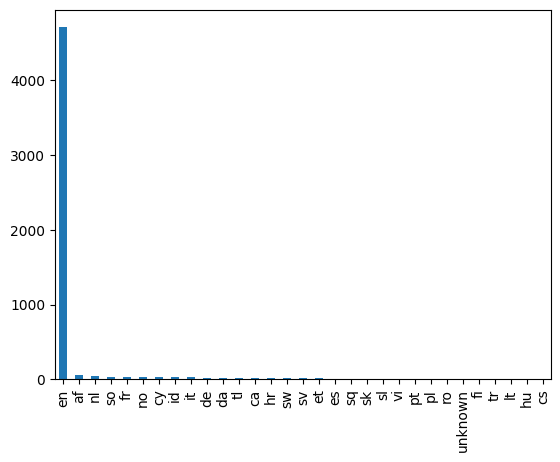

In [ ]:
df['language'].value_counts().plot(kind='bar')

In [ ]:
df.drop(df[df['language'] != 'en'].index, inplace=True)

<ipython-input-12-77661c34dd54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(df[df['language'] != 'en'].index, inplace=True)


In [ ]:
display(df.count())

class       4708
message     4708
language    4708
dtype: int64

In [ ]:
# Lowercase all
df['message'] = df['message'].str.lower()
display(df)

<ipython-input-14-e803779ca934>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.lower()


,class,message,language
0,0,"go until jurong point, crazy.. available only ...",en
2,1,free entry in 2 a wkly comp to win fa cup fina...,en
3,0,u dun say so early hor... u c already then say...,en
4,0,"nah i don't think he goes to usf, he lives aro...",en
5,1,freemsg hey there darling it's been 3 week's n...,en
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,en
5568,0,will ì_ b going to esplanade fr home?,en
5569,0,"pity, * was in mood for that. so...any other s...",en
5570,0,the guy did some bitching but i acted like i'd...,en


In [ ]:
#delete punctuation word
pattern = r"[^\w\s]"

df['message'] = df['message'].str.replace(pattern, '', regex=True)
display(df)

<ipython-input-15-1afc2fc56d2e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['message'] = df['message'].str.replace(pattern, '', regex=True)


,class,message,language
0,0,go until jurong point crazy available only in ...,en
2,1,free entry in 2 a wkly comp to win fa cup fina...,en
3,0,u dun say so early hor u c already then say,en
4,0,nah i dont think he goes to usf he lives aroun...,en
5,1,freemsg hey there darling its been 3 weeks now...,en
...,...,...,...
5567,1,this is the 2nd time we have tried 2 contact u...,en
5568,0,will ì_ b going to esplanade fr home,en
5569,0,pity was in mood for that soany other suggest...,en
5570,0,the guy did some bitching but i acted like id ...,en


In [ ]:
# Count spam and ham messages
spam_count = df["class"].value_counts()[1]
ham_count = df["class"].value_counts()[0]

count_data = pd.DataFrame({"Class": ["Spam", "Ham"], "Count": [spam_count, ham_count]})
count_data

,Class,Count
0,Spam,647
1,Ham,4061


In [ ]:
#make spam ham dataset equals
df = df.drop(df[df['class'] == 0].index[:3407])

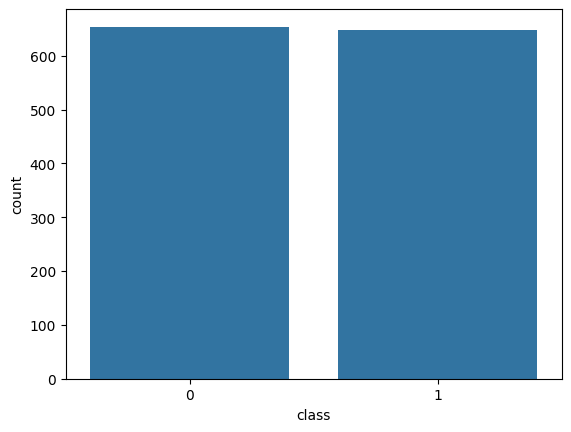

In [ ]:
ax = sns.countplot(x="class", data=df)

## DATA PREPROCESSING

Feature Extraction with word embedding<br />
1.CountVectorizer </br>
2.TFIDF

In [ ]:
#transform sentence into vector or sentence embedding to vector with CountVectorizer
countVectorizer = CountVectorizer()
#transform sentence into vector or sentence embedding to vector with TFIDF
tfidfVectorizer = TfidfVectorizer(max_features=df.size)  # You can adjust max_features based on your dataset size

In [ ]:
class SplitTrainTest():
  def splitData(self, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [ ]:
X_cv = countVectorizer.fit_transform(df['message'])
X_tfidf = tfidfVectorizer.fit_transform(df['message'])
y = df['class']

a = SplitTrainTest()
X_train_countVectorizer, X_test_countVectorizer, y_train_countVectorizer, y_test_countVectorizer = a.splitData(X_cv, y)
X_train_tfidfVectorizer, X_test_tfidfVectorizer, y_train_tfidfVectorizer, y_test_tfidfVectorizer = a.splitData(X_tfidf, y)

#Build model

Machine Learning model <br />
1. Naive Bayes Classifier
2. Logistic Regression
3. RandomForest Classifier

In [ ]:
class BuildModel() :
  def createMultinomialNB(self, X_train, y_train):
    model = MultinomialNB()
    model.fit(X_train, y_train)
    return model

  def createLogisticRegression(self, X_train, y_train):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    return model

  def createRandomForestClassifier(self, X_train, y_train):
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    return model

In [ ]:
m = BuildModel()

# Types of Naive Bayes Classification use in text classification for discrete counts
nb_cv = m.createMultinomialNB(X_train_countVectorizer, y_train_countVectorizer)
nb_tfidf = m.createMultinomialNB(X_train_tfidfVectorizer, y_train_tfidfVectorizer)

lg_cv = m.createLogisticRegression(X_train_countVectorizer, y_train_countVectorizer)
lg_tfidf = m.createLogisticRegression(X_train_tfidfVectorizer, y_train_tfidfVectorizer)

rf_cv = m.createRandomForestClassifier(X_train_countVectorizer, y_train_countVectorizer)
rf_tfidf = m.createRandomForestClassifier(X_train_tfidfVectorizer, y_train_tfidfVectorizer)

#Evaluate Model

In [ ]:
#make prediction on test data
#for Naive Bayes Classifier
y_pred_cv_nb = nb_cv.predict(X_test_countVectorizer)
y_pred_tfidf_nb = nb_tfidf.predict(X_test_tfidfVectorizer)

#for Logistic Regression
y_pred_cv_lg = lg_cv.predict(X_test_countVectorizer)
y_pred_tfidf_lg = lg_tfidf.predict(X_test_tfidfVectorizer)

#for RandomForest Classifier
y_pred_cv_rf = rf_cv.predict(X_test_countVectorizer)
y_pred_tfidf_rf = rf_tfidf.predict(X_test_tfidfVectorizer)

In [ ]:
# Evaluate the model
def evaluate_model(y_test, y_pred, title):
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)
  classification_rep = classification_report(y_test, y_pred)
  print(title)
  print(f"Accuracy: {accuracy:.2f}")
  print("Confusion Matrix:")
  print(conf_matrix)
  print("Classification Report:")
  print(classification_rep)
  print()

def plot_classification_report(classification_rep, title):
    report_data = []
    lines = classification_rep.split("\n")
    for line in lines[2:-5]:
        row = {}
        row_data = line.split()
        row["class"] = row_data[0]
        row["precision"] = float(row_data[1])
        row["recall"] = float(row_data[2])
        row["f1-score"] = float(row_data[3])
        report_data.append(row)

    df = pd.DataFrame(report_data)
    df.set_index("class", inplace=True)

    plt.figure(figsize=(10, 5))
    sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=0.5, cbar=False)
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

In [ ]:
evaluate_model(y_test_countVectorizer, y_pred_cv_nb, "CountVectorizer + Naive Bayes Classifier")
evaluate_model(y_test_tfidfVectorizer, y_pred_tfidf_nb, "TFIDF + Naive Bayes Classifier")
evaluate_model(y_test_countVectorizer, y_pred_cv_lg, "CountVectorizer + Logistic Regression")
evaluate_model(y_test_tfidfVectorizer, y_pred_tfidf_lg, "TFIDF + Logistic Regression")
evaluate_model(y_test_countVectorizer, y_pred_cv_rf, "CountVectorizer + RandomForest Classifier")
evaluate_model(y_test_tfidfVectorizer, y_pred_tfidf_rf, "TFIDF + RandomForest Classifier")

CountVectorizer + Naive Bayes Classifier
Accuracy: 0.94
Confusion Matrix:
[[129   3]
 [ 12 117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       132
           1       0.97      0.91      0.94       129

    accuracy                           0.94       261
   macro avg       0.94      0.94      0.94       261
weighted avg       0.94      0.94      0.94       261


TFIDF + Naive Bayes Classifier
Accuracy: 0.94
Confusion Matrix:
[[129   3]
 [ 12 117]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.95       132
           1       0.97      0.91      0.94       129

    accuracy                           0.94       261
   macro avg       0.94      0.94      0.94       261
weighted avg       0.94      0.94      0.94       261


CountVectorizer + Logistic Regression
Accuracy: 0.95
Confusion Matrix:
[[131   1]
 [ 12 117]]
Classification Repor

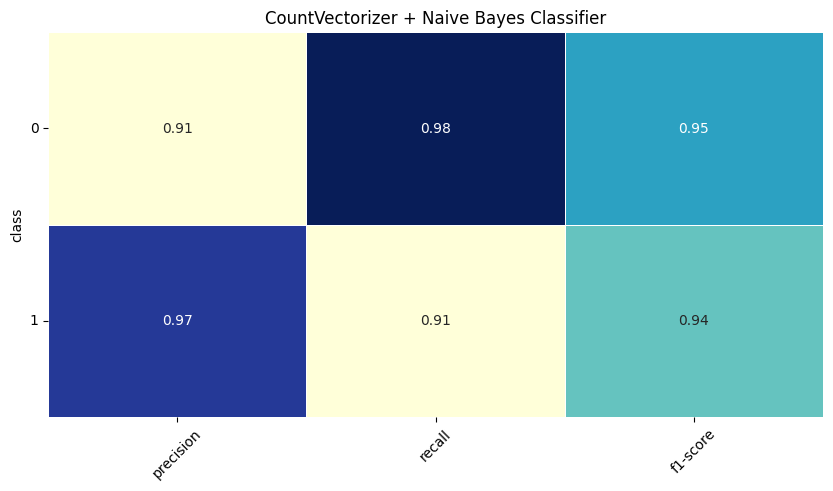

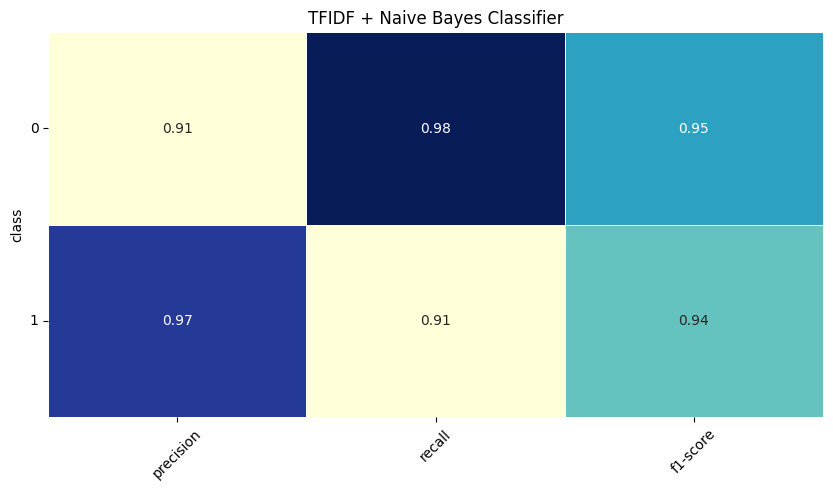

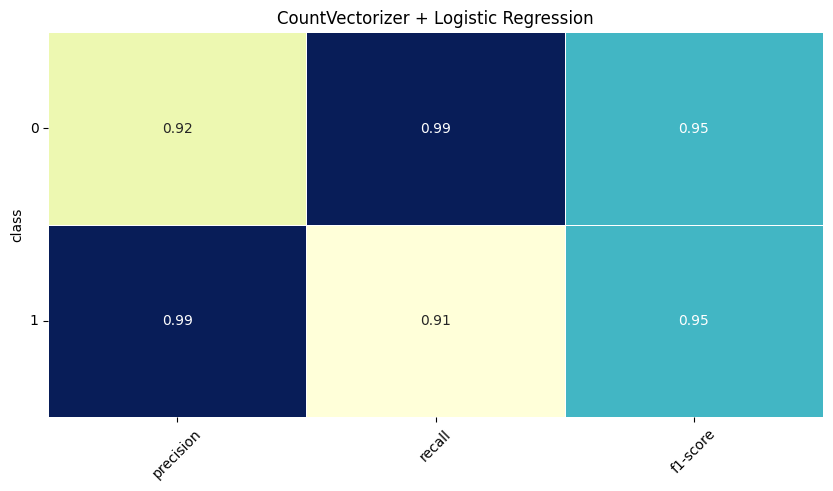

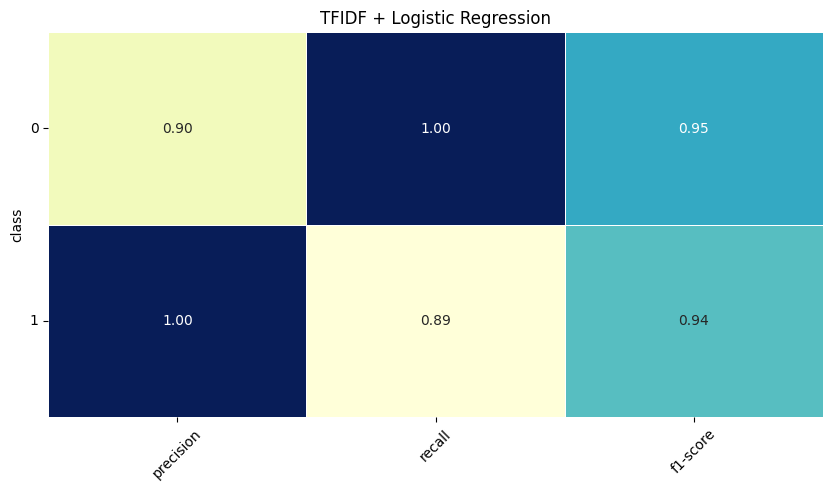

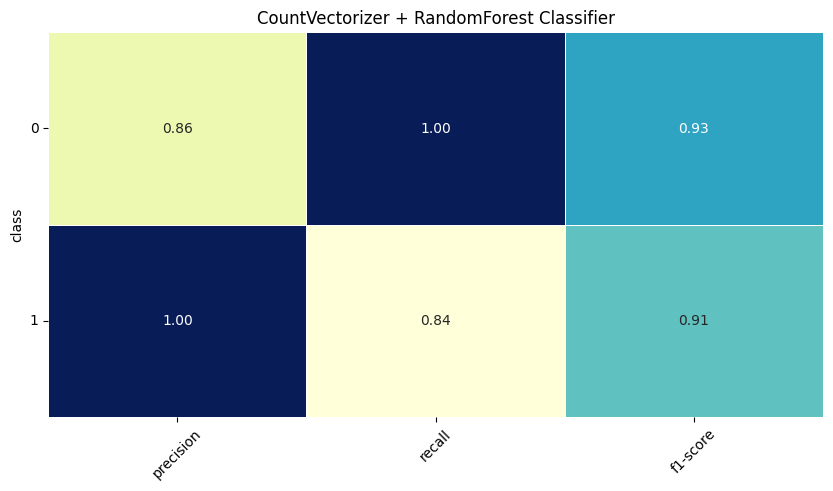

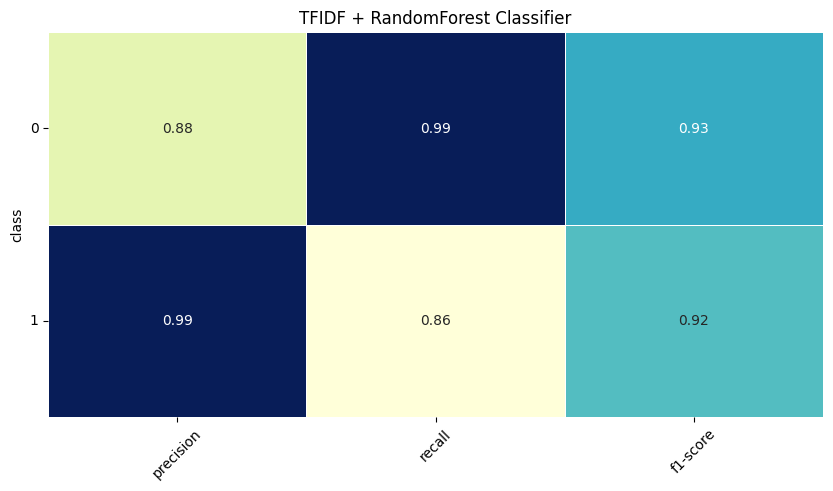

In [ ]:
# Call plot_classification_report function for each model
plot_classification_report(
    classification_report(y_test_countVectorizer, y_pred_cv_nb),
    "CountVectorizer + Naive Bayes Classifier",)
plot_classification_report(
    classification_report(y_test_tfidfVectorizer, y_pred_tfidf_nb),
    "TFIDF + Naive Bayes Classifier",
)
plot_classification_report(
    classification_report(y_test_countVectorizer, y_pred_cv_lg),
    "CountVectorizer + Logistic Regression",
)
plot_classification_report(
    classification_report(y_test_tfidfVectorizer, y_pred_tfidf_lg),
    "TFIDF + Logistic Regression",
)
plot_classification_report(
    classification_report(y_test_countVectorizer, y_pred_cv_rf),
    "CountVectorizer + RandomForest Classifier",
)
plot_classification_report(
    classification_report(y_test_tfidfVectorizer, y_pred_tfidf_rf),
    "TFIDF + RandomForest Classifier",
)

#Example Input

In [ ]:
def clean_text(text):
  return ' '.join(gensim.utils.simple_preprocess(text))

def predict_spam_ham(input_text, vectorizer, model, i):
  clean_input = clean_text(input_text)
  input_vectorized = vectorizer.transform([clean_input])
  predicted_class = model.predict(input_vectorized)

  class_labels = {0: "Ham", 1: "Spam"}
  predicted_label = class_labels[predicted_class[0]]

  print(f"Message {i}: '{input_text}' is {predicted_label}")

In [ ]:
example_input = [
  "Congratulations! You’ve won a $500 Amazon gift card. Claim it here www.googley.com"
, "You’ve been overcharged for your 2021 taxes. Get your IRS tax refund here: blog.yahood.com"
, "Get delivery updates on your USPS order 084-568-7458 here: www.appl.com"
, "Congratulations! Your credit score entitles you to a no-interest Visa credit card. Click here to claim: www.htttp.com"
, "We’ve received your resume and would love to set up an online interview. Click here www.yahood.com or call us at 085-666-8745"
]
print("Model : Logistic Regression with TFIDFVectorizer")
for i ,m in enumerate(example_input):
  # predicted_label_cv_nb = predict_spam_ham(example_input[i], countVectorizer, nb_cv, i+1)
  # predicted_label_tfidf_nb = predict_spam_ham(example_input[i], tfidfVectorizer, nb_tfidf, i+1)
  # predicted_label_cv_lg = predict_spam_ham(example_input[i], countVectorizer, lg_cv, i+1)
  predicted_label_tfidf_lg = predict_spam_ham(example_input[i], tfidfVectorizer, lg_tfidf, i+1)
  # predicted_label_cv_rf = predict_spam_ham(example_input[i], countVectorizer, rf_cv, i+1)
  # predicted_label_tfidf_rf = predict_spam_ham(example_input[i], tfidfVectorizer, rf_tfidf, i+1)


Model : Logistic Regression with TFIDFVectorizer
Message 1: 'Congratulations! You’ve won a $500 Amazon gift card. Claim it here www.googley.com' is Spam
Message 2: 'You’ve been overcharged for your 2021 taxes. Get your IRS tax refund here: blog.yahood.com' is Spam
Message 3: 'Get delivery updates on your USPS order 084-568-7458 here: www.appl.com' is Spam
Message 4: 'Congratulations! Your credit score entitles you to a no-interest Visa credit card. Click here to claim: www.htttp.com' is Spam
Message 5: 'We’ve received your resume and would love to set up an online interview. Click here www.yahood.com or call us at 085-666-8745' is Spam
